In [28]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load Data

In [2]:
# SBO Data
df = pd.read_csv("passwordEntries.csv", parse_dates=["timestamp"])
df

,client_id,domain,timestamp
0,297340,imvu.com,2016-12-25 04:12:25
1,297340,imvu.com,2016-12-25 04:12:27
2,297340,cpp.edu,2016-12-25 04:36:27
3,297340,cpp.edu,2016-12-25 04:36:34
4,297340,cpp.edu,2016-12-25 04:36:42
...,...,...,...
274381,245107,duke-energy.com,2017-07-14 17:43:53
274382,245107,duke-energy.com,2017-07-14 17:44:16
274383,245107,duke-energy.com,2017-07-14 17:43:54
274384,245107,duke-energy.com,2017-07-14 17:44:16


In [49]:
# Tranco Data
# "This list aggregates the ranks from the lists provided by
# Alexa, Umbrella, Majestic, and Quantcast
# from 02 November 2018 to 01 December 2018 (30 days)."
# https://tranco-list.eu/list/XJ4N/1000000
t_df = pd.read_csv("tranco_XJ4N.csv",
                   index_col="domain",
                   names=["tranco_rank", "domain"])
t_df

,tranco_rank
domain,
google.com,1
netflix.com,2
facebook.com,3
youtube.com,4
amazon.com,5
...,...
gsrimpressions.com,7410675
smartaquafarms.com,7410676
stay-in-the-zone.dk,7410677


In [61]:
def get_tranco_rank(row):
    if row["domain"] in t_df.index:
        return t_df.loc[row["domain"]].tranco_rank
    else:
        return None

df["tranco_rank"] = df.apply(get_tranco_rank, axis=1)
df

,client_id,domain,timestamp,tranco_rank
0,297340,imvu.com,2016-12-25 04:12:25,7069.0
1,297340,imvu.com,2016-12-25 04:12:27,7069.0
2,297340,cpp.edu,2016-12-25 04:36:27,17244.0
3,297340,cpp.edu,2016-12-25 04:36:34,17244.0
4,297340,cpp.edu,2016-12-25 04:36:42,17244.0
...,...,...,...,...
274381,245107,duke-energy.com,2017-07-14 17:43:53,6294.0
274382,245107,duke-energy.com,2017-07-14 17:44:16,6294.0
274383,245107,duke-energy.com,2017-07-14 17:43:54,6294.0
274384,245107,duke-energy.com,2017-07-14 17:44:16,6294.0


In [112]:
def get_domain_df(df):
    domains = []
    n_participants = []
    tranco_ranks = []
    for domain in df["domain"].unique():
        domains.append(domain)
        same_domain = df.loc[df["domain"] == domain]
        n_participants.append(same_domain["client_id"].nunique())
        tranco_ranks.append(same_domain["tranco_rank"].iloc[0])
    return pd.DataFrame({"domain": domains, "n_participants": n_participants, "tranco_rank": tranco_ranks})

d_df = get_domain_df(df)
d_df

,domain,n_participants,tranco_rank
0,imvu.com,2,7069.0
1,cpp.edu,1,17244.0
2,talx.com,3,26104.0
3,ipoll.com,4,308865.0
4,pineconeresearch.com,9,38086.0
...,...,...,...
4329,ncsu.edu,1,1445.0
4330,centerviewatcrossroads.com,1,5684285.0
4331,tn.gov,1,4993.0
4332,progress-energy.com,1,59625.0


# Number of Participants

In [11]:
df["client_id"].nunique()

207

In [9]:
df["client_id"].value_counts()

165955    11910
199112    10300
222452     6635
141524     6504
195453     6463
          ...  
113354        4
230485        2
164858        2
234092        1
141924        1
Name: client_id, Length: 207, dtype: int64

# Number of Domains

In [7]:
df["domain"].nunique()

4334

# How many domains did people log into?

In [13]:
n_domains = []
for cid in df["client_id"].unique():
    n_domains.append(df.loc[df["client_id"] == cid]["domain"].nunique())
len(n_domains)

207

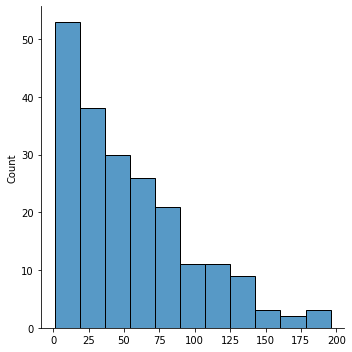

In [15]:
sns.displot(n_domains)

# When was the data collected?

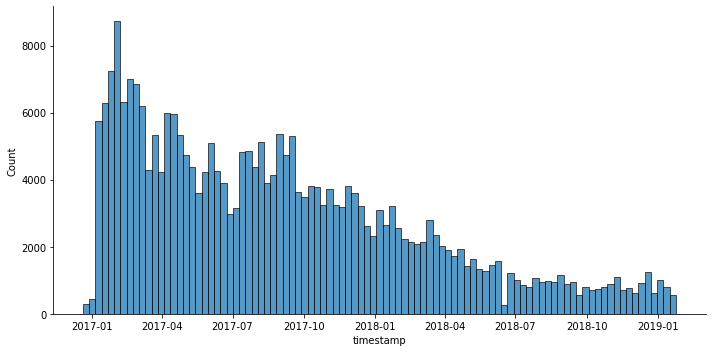

In [22]:
sns.displot(df["timestamp"], height=5, aspect=2)

In [14]:
df["timestamp"].min(), df["timestamp"].max(), df["timestamp"].median()

(Timestamp('2016-12-20 03:05:47'),
 Timestamp('2019-01-23 22:54:58'),
 Timestamp('2017-08-03 05:46:21.500000'))

# Which Domains Were Most Popular?
i.e., which domains were logged into by the greatest number of SBO participants?

In [111]:
d_df.sort_values("n_participants", ascending=False)

,domain,n_participants,tranco_rank
7,amazon.com,172,5.0
8,google.com,155,1.0
179,facebook.com,135,3.0
21,paypal.com,99,49.0
20,sona-systems.com,94,22287.0
...,...,...,...
504,optum.com,1,10046.0
2276,edinboro.edu,1,74647.0
503,nflpickspage.com,1,905313.0
2278,mysweatypursuits.com,1,2758848.0


# How does domain popularity compare to Tranco ratings?

**TODO: The data below show some cleaning needs to be done!** We might also want to remove domains that were involved in the study.

In [23]:
# First, check whether anything doesn't appear in the Tranco ratings
# !!! This shows need for some cleanup. TLDs weren't processed correctly, IPs weren't, etc.
unranked = set(df["domain"].unique()) -  set(t_df["domain"].unique())
unranked

{'0.1',
 '1.1',
 '1.114',
 '10.1',
 '100.1',
 '102.241',
 '125.180',
 '126.42',
 '129.197',
 '136.197',
 '149.5',
 '150.108',
 '2.1',
 '2020identity.com',
 '220.9',
 '24.116',
 '24.118',
 '3.1',
 '33.1',
 '58.143',
 '62.51',
 '81.254',
 '90.48',
 '[2603:3015:2605:d3e1:c2c1:c0ff:fed9:e424]',
 'ac.il',
 'ac.in',
 'ac.jp',
 'ac.uk',
 'adeccojobsearch.com',
 'adminderresearch.com',
 'alcurex.com',
 'allthings-hair.com',
 'amara.life',
 'americanpopulationpanel.org',
 'anasynchro.org',
 'appilc.com',
 'arthritispower.org',
 'aspiteauction.com',
 'atitandrivingschool.com',
 'atkpas.com',
 'babytobeeresearch.com',
 'backend.dev',
 'baitcon.org',
 'baseballclassics.com',
 'bellasmachine.com',
 'bellenista.com',
 'benefits365advisorycouncil.com',
 'benspiration.com',
 'butteredcatlabs.com',
 'buygiftsave.com',
 'bwwteenpanel.com',
 'ca.us',
 'canneryrowinn.com',
 'capsulenetworks.com',
 'ceinina.org',
 'cellpropulsion.com',
 'centrumpay.com',
 'checkealos.com',
 'citysurveyrewards.com',
 'clini

In [26]:
len(unranked)

245

In [63]:
min(df["tranco_rank"]), max(df["tranco_rank"])

(1.0, 7376670.0)

Comparing the number of participants we saw log into different domains to those domain's Tranco rakings. Useful for identifying sites, like cmu.edu and sona-systems.com, which were study specific.

<IPython.core.display.Javascript object>


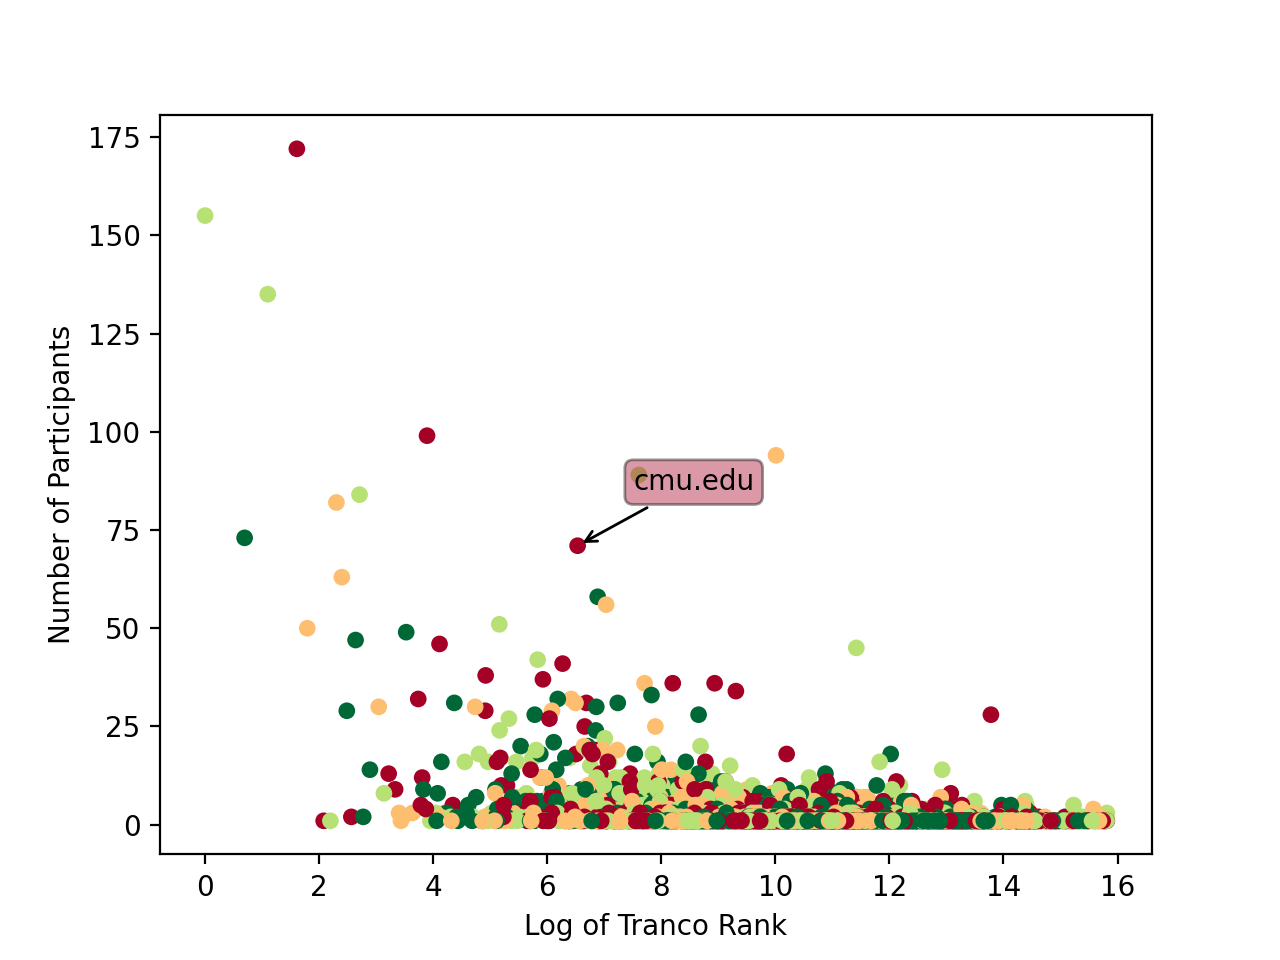

In [86]:
# Based on: https://stackoverflow.com/a/47166787
x = np.log(d_df["tranco_rank"])
# x = d_df["tranco_rank"]
y = d_df["n_participants"]
np.random.seed(42)
c = np.random.randint(1,5,size=len(x))

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=25, cmap=cmap, norm=norm)
ax.set_ylabel("Number of Participants")
ax.set_xlabel("Log of Tranco Rank")

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(attrd):
    pos = sc.get_offsets()[attrd["ind"][0]]
    annot.xy = pos
    # Multiple indices can be under the cursor at the same time
    domains = []
    for ind in attrd["ind"]:
        domains.append(d_df.iloc[ind].domain)
    annot.set_text("\n".join(domains))
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[attrd["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def onclick(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, attrd = sc.contains(event)
        if cont:
            update_annot(attrd)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("button_press_event", onclick)

plt.show()

I think the ECDF plot below could be useful for selecting which websites to test. In the graph, for each domain represented in the SBO data, I count the domain's Tranco rank as many times as unique participants logged into it (i.e., the number of accounts on the domain, assuming each SBO participant only had one account on each domain). Looking at a particular x-axis value shows the proportion of observed accounts with that Tranco rank or lower. For example, looking at x=1 (i.e., the most popular domain according to Tranco) we see that 1.5% of the accounts were on this domain. 

If I’m thinking about it correctly, the graph shows that if you look at the top-1000 most popular websites, this only captures ~30% of the websites people have accounts on. I could use this graph to decide which Tranco rankings to sample from, to gather a representative sample. For example, with three equal sized buckets, I might sample the most popular domains from those with Tranco ratings 1-1000, medium popularity from 1001-25,000, least popular from 25,001-10,000,000. Of course, I would also sample from the original SBO data, and test for differences between the SBO data and the Tranco-derived data. 


<IPython.core.display.Javascript object>


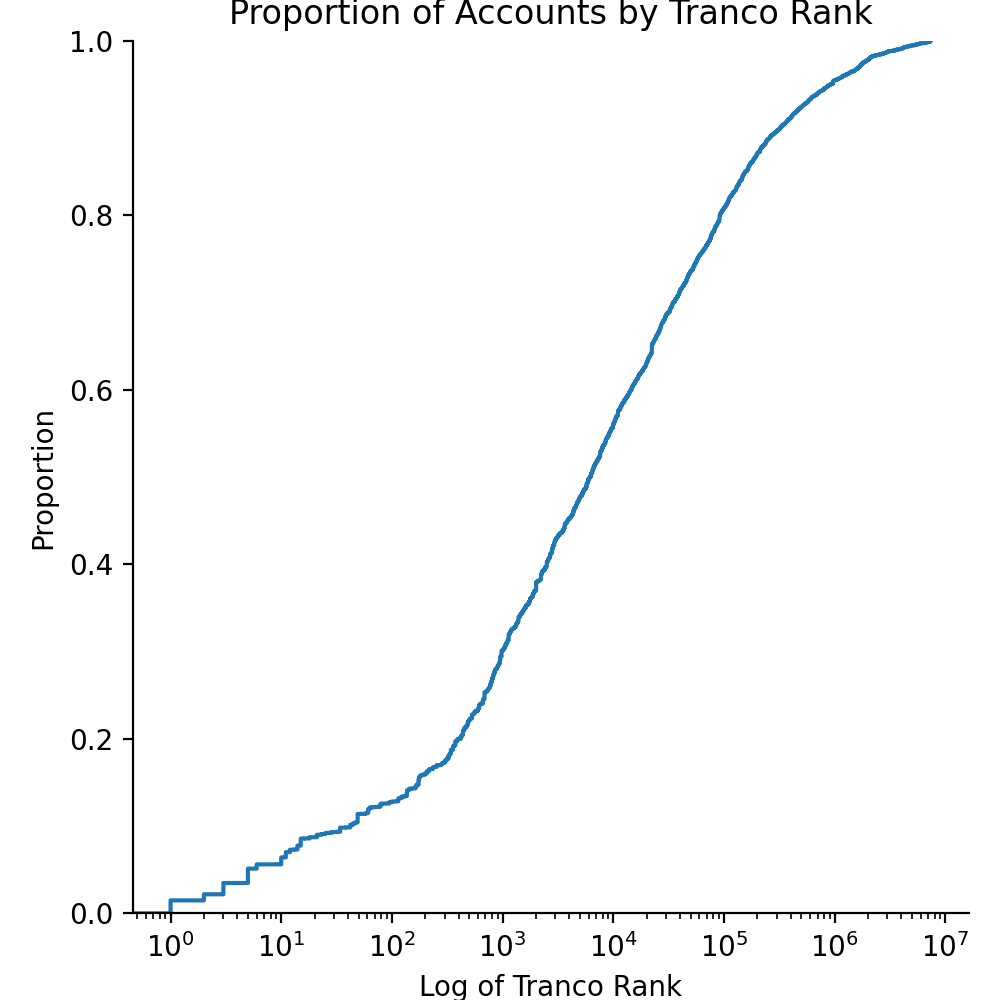

In [120]:
x = []
for index, row in d_df.iterrows():
    x.extend([row["tranco_rank"]] * row["n_participants"])
# https://seaborn.pydata.org/tutorial/distributions.html#empirical-cumulative-distributions
g = sns.displot(x=x, kind="ecdf", log_scale=True)
g.axes.flat[0].set_title("Proportion of Accounts by Tranco Rank")
g.set_xlabels("Log of Tranco Rank")

<IPython.core.display.Javascript object>


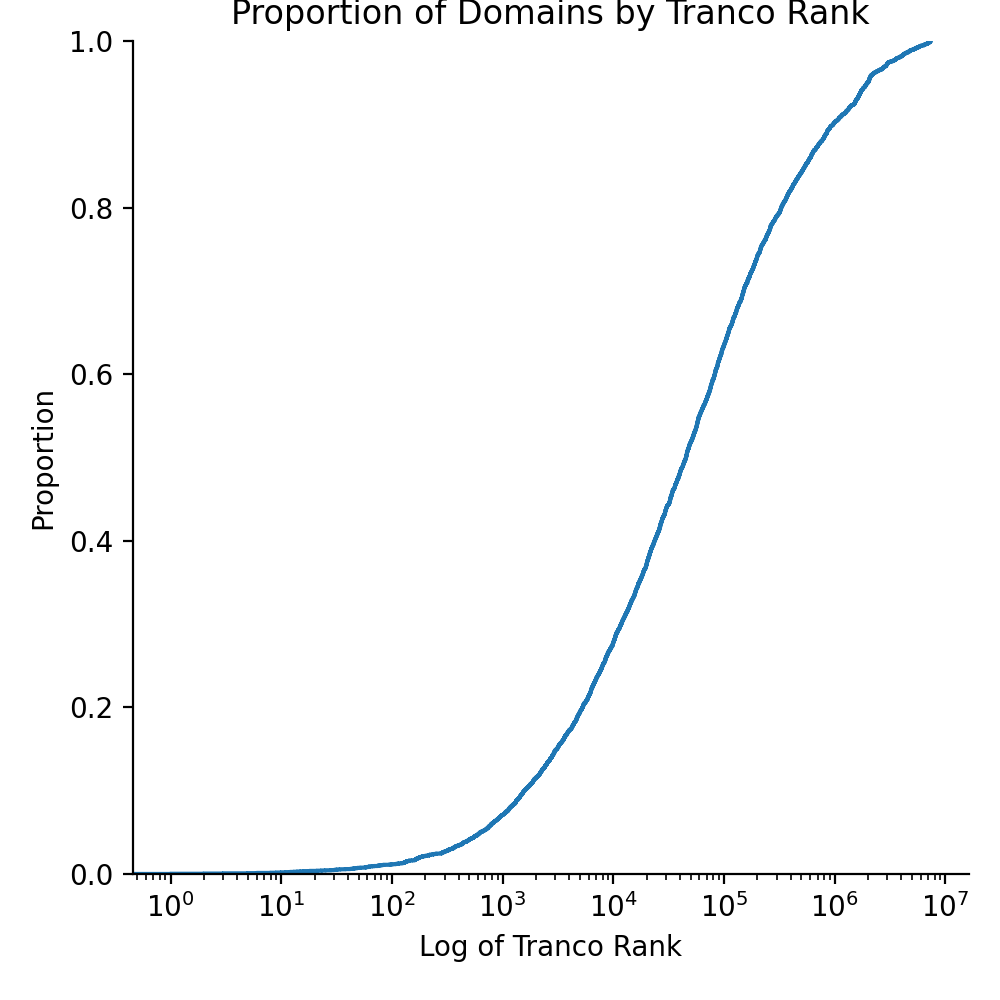

In [121]:
# https://seaborn.pydata.org/tutorial/distributions.html#empirical-cumulative-distributions
g = sns.displot(data=d_df, x="tranco_rank", kind="ecdf", log_scale=True)
g.axes.flat[0].set_title("Proportion of Domains by Tranco Rank")
g.set_xlabels("Log of Tranco Rank")

# Other things to check
- Did domain popularity change over time?